In [3]:
!pip install nltk gensim matplotlib wordcloud scikit-learn


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.5 MB/s  0:00:00
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ------------ --------------------------- 7.6/24.4 MB 36.2 MB/s eta 0:00:01
   ------------------ --------------------- 11.5/24.4 MB 27.7 MB/s eta 0:00:01
   --------------------- ------------------ 13.4/24.4 MB 21.0 MB/s eta 0:00:01
   -------------------------- ------------- 16.3/24.4 MB 19.3 MB/s eta 0:00:01
   ---------------------------- ----------- 17.6/24.4 MB 17.3 MB/s eta 0:00:01
   ------------------------------ --------- 18.4/24.4 MB 14.8 MB/s eta 0:00:01
   ------------------------------- -------- 19.1/24.4 MB 13.1 MB/s eta 0:00:01
   --------------------------------- ------ 20.2/24.4 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 21.2/24.4 MB 11.0 MB/s eta 0:00:01
   ----------

In [4]:
# Core libraries
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download required NLTK data
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
# Load the Game of Thrones text file
with open('got.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Display first 500 characters
print(text[:500])


A Game Of Thrones 
Book One of A Song of Ice and Fire 
By George R. R. Martin 
PROLOGUE 
"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are 
dead." 
"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. 
Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. 
"Dead is dead," he said. "We have no business with the dead." 
"Are they dead?" Royce asked softly. "What proof 


In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [8]:
# Lowercase
text = text.lower()

# Remove special characters and digits
text = re.sub(r'[^a-zA-Z\s]', '', text)

# Sentence tokenization
sentences = sent_tokenize(text)

# Tokenize each sentence into words
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Display sample tokens
print(tokenized_sentences[:3])


[['a', 'game', 'of', 'thrones', 'book', 'one', 'of', 'a', 'song', 'of', 'ice', 'and', 'fire', 'by', 'george', 'r', 'r', 'martin', 'prologue', 'we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them', 'the', 'wildlings', 'are', 'dead', 'do', 'the', 'dead', 'frighten', 'you', 'ser', 'waymar', 'royce', 'asked', 'with', 'just', 'the', 'hint', 'of', 'a', 'smile', 'gared', 'did', 'not', 'rise', 'to', 'the', 'bait', 'he', 'was', 'an', 'old', 'man', 'past', 'fifty', 'and', 'he', 'had', 'seen', 'the', 'lordlings', 'come', 'and', 'go', 'dead', 'is', 'dead', 'he', 'said', 'we', 'have', 'no', 'business', 'with', 'the', 'dead', 'are', 'they', 'dead', 'royce', 'asked', 'softly', 'what', 'proof', 'have', 'we', 'will', 'saw', 'them', 'gared', 'said', 'if', 'he', 'says', 'they', 'are', 'dead', 'thats', 'proof', 'enough', 'for', 'me', 'will', 'had', 'known', 'they', 'would', 'drag', 'him', 'into', 'the', 'quarrel', 'sooner', 'or', 'later', 

In [30]:
# Remove short words and stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

cleaned_sentences = [
    [word for word in sentence if word not in stop_words and len(word) > 2]
    for sentence in tokenized_sentences
]

print(cleaned_sentences[0:1])


[['game', 'thrones', 'book', 'one', 'song', 'ice', 'fire', 'george', 'martin', 'prologue', 'start', 'back', 'gared', 'urged', 'woods', 'began', 'grow', 'dark', 'around', 'wildlings', 'dead', 'dead', 'frighten', 'ser', 'waymar', 'royce', 'asked', 'hint', 'smile', 'gared', 'rise', 'bait', 'old', 'man', 'past', 'fifty', 'seen', 'lordlings', 'come', 'dead', 'dead', 'said', 'business', 'dead', 'dead', 'royce', 'asked', 'softly', 'proof', 'saw', 'gared', 'said', 'says', 'dead', 'thats', 'proof', 'enough', 'known', 'would', 'drag', 'quarrel', 'sooner', 'later', 'wished', 'later', 'rather', 'sooner', 'mother', 'told', 'dead', 'men', 'sing', 'songs', 'put', 'wet', 'nurse', 'said', 'thing', 'royce', 'replied', 'never', 'believe', 'anything', 'hear', 'womans', 'tit', 'things', 'learned', 'even', 'dead', 'voice', 'echoed', 'loud', 'twilit', 'forest', 'page', 'long', 'ride', 'gared', 'pointed', 'eight', 'days', 'maybe', 'nine', 'night', 'falling', 'ser', 'waymar', 'royce', 'glanced', 'sky', 'disint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
cleaned_sentences = []  # This will store all the cleaned sentences

for sentence in tokenized_sentences:  # Go through each sentence
    cleaned_sentence = []  # List to store cleaned words from this sentence

    for word in sentence:  # Go through each word in the sentence
        # Keep the word only if:
        # 1. It's not a stopword, and
        # 2. It's longer than 2 letters
        if word not in stop_words and len(word) > 2:
            cleaned_sentence.append(word)

    # Add the cleaned sentence to the main list
    cleaned_sentences.append(cleaned_sentence)


In [11]:
# Train the Word2Vec model
model = Word2Vec(
    sentences=cleaned_sentences,
    vector_size=100,  # dimension of embeddings
    window=10,         # context window size
    min_count=3,      # ignore words with low frequency
    sg=1,             # skip-gram model (use sg=0 for CBOW)
    workers=4,        # number of CPU threads
    epochs=10
)

# Save model
model.save("got_word2vec.model")

print("✅ Word2Vec model trained and saved.")


✅ Word2Vec model trained and saved.


In [12]:
model.wv.most_similar('daenerys')

[('landing', 0.9987636804580688),
 ('oils', 0.9987008571624756),
 ('talked', 0.9986938238143921),
 ('usurper', 0.9986185431480408),
 ('dragonstone', 0.9986182451248169),
 ('jewels', 0.9985834360122681),
 ('overgrown', 0.9985654950141907),
 ('kingslayer', 0.9985542893409729),
 ('run', 0.9985535740852356),
 ('laws', 0.9985397458076477)]

In [13]:
# Load model (optional if you restarted runtime)
model = Word2Vec.load("got_word2vec.model")

# Check vocabulary size
print(f"Vocabulary size: {len(model.wv)}")

# Find most similar words
print(model.wv.most_similar("jon", topn=10))
print(model.wv.most_similar("winter", topn=10))


Vocabulary size: 5835
[('father', 0.9920092821121216), ('bran', 0.9879419207572937), ('well', 0.9856534004211426), ('said', 0.9844921231269836), ('lord', 0.9783615469932556), ('bastard', 0.9777842164039612), ('yes', 0.9772147536277771), ('robb', 0.976496696472168), ('never', 0.9762186408042908), ('stark', 0.9760086536407471)]
[('hope', 0.9990778565406799), ('people', 0.999005913734436), ('cups', 0.9989357590675354), ('next', 0.9989318251609802), ('lens', 0.9989229440689087), ('quietly', 0.9989163279533386), ('glad', 0.9989094734191895), ('often', 0.9989058971405029), ('disappointment', 0.998893141746521), ('trueborn', 0.9988917708396912)]


In [14]:
# Display vector for a specific word
print(model.wv["dragon"])

# Vector dimension check
print("Vector dimension:", model.vector_size)


[-0.04793979  0.19380088  0.06373151 -0.26134083 -0.16725221 -0.38861564
  0.01024534  0.48730648 -0.24038161  0.22822116 -0.21232165 -0.423862
  0.10202099  0.0145459   0.01870112 -0.12267737 -0.08989628 -0.24644822
 -0.02636069 -0.09764892  0.13500899  0.1439302  -0.25500417 -0.10346983
 -0.09241542  0.06172894 -0.47103426 -0.26285234 -0.23248453 -0.02506884
  0.05616786  0.03026668  0.5165121   0.20525002 -0.0399352   0.42890847
  0.09821281 -0.28147408  0.08694366 -0.30986294 -0.1282568  -0.0229537
 -0.05212704 -0.11625906  0.1292836  -0.1665589  -0.03384518  0.08938488
 -0.1356795   0.23565148 -0.06002405 -0.34693378 -0.13017163 -0.15822835
 -0.2572887   0.17468168 -0.03459678 -0.1451905   0.013367    0.18922979
  0.13970162  0.45711285  0.03363671 -0.11057678 -0.1860655   0.10018652
  0.0108624  -0.07076593 -0.03754523  0.34316814 -0.05147133  0.11268668
  0.17479429 -0.52031237  0.5477273   0.12559985 -0.14697348  0.01817659
 -0.22589748 -0.06912161 -0.21790278  0.02748727  0.14

In [15]:
# Analogy example: Jon - man + woman = ?
try:
    result = model.wv.most_similar(positive=['jon', 'woman'], negative=['man'], topn=5)
    print(result)
except KeyError:
    print("Word not found in vocabulary!")


[('father', 0.988083004951477), ('well', 0.9879039525985718), ('bran', 0.9872568249702454), ('said', 0.9864040017127991), ('lord', 0.9842344522476196)]


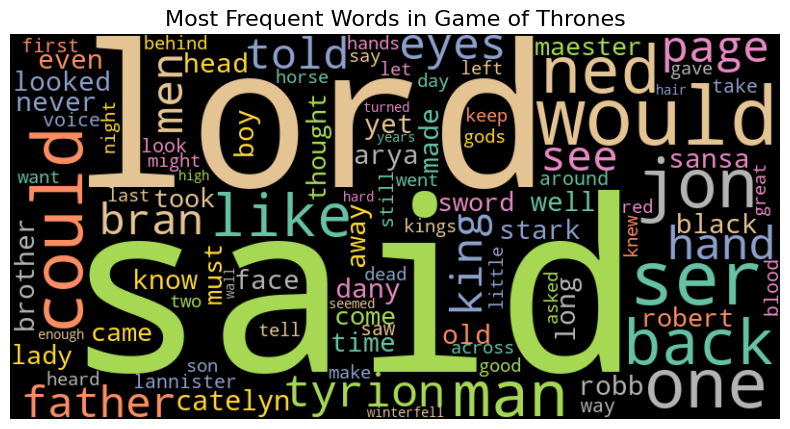

In [16]:
# Flatten all tokens
all_words = [word for sent in cleaned_sentences for word in sent]

# Get frequency count
word_freq = Counter(all_words)
common_words = dict(word_freq.most_common(100))

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color='black', colormap='Set2')
wc.generate_from_frequencies(common_words)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Game of Thrones", fontsize=16)
plt.show()


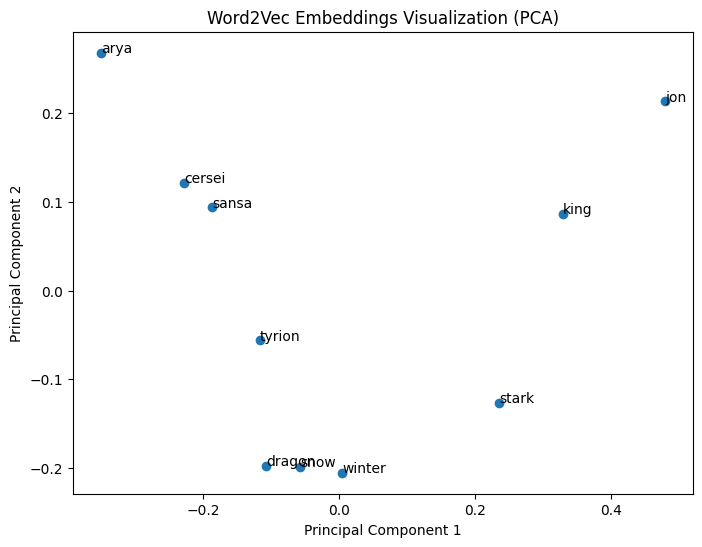

In [17]:
from sklearn.decomposition import PCA

# Select subset of words for visualization
words = ["jon", "snow", "arya", "sansa", "stark", "tyrion", "cersei", "dragon", "winter", "king"]
word_vectors = [model.wv[word] for word in words if word in model.wv]

# Reduce dimensions with PCA
pca = PCA(n_components=2)
vec_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(8,6))
plt.scatter(vec_2d[:,0], vec_2d[:,1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(vec_2d[i,0], vec_2d[i,1]))

plt.title("Word2Vec Embeddings Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [19]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --------------- ------------------------ 3.9/9.9 MB 26.0 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 25.7 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narw

In [24]:
import plotly.io as pio

# Set default renderer for Jupyter/Colab
pio.renderers.default = 'notebook_connected'

In [26]:


# Imports
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np

# Extract word vectors and corresponding words
words = model.wv.index_to_key  # list of vocabulary words
word_vectors = np.array([model.wv[word] for word in words])

# Reduce dimensions to 3 using PCA
pca = PCA(n_components=3)
X = pca.fit_transform(word_vectors)

# Select a subset (e.g., 200–300 words) for clarity
start, end = 200, 300
subset_words = words[start:end]
subset_vectors = X[start:end]

# Create 3D scatter plot
fig = px.scatter_3d(
    x=subset_vectors[:, 0],
    y=subset_vectors[:, 1],
    z=subset_vectors[:, 2],
    text=subset_words,        # hover text
    color=subset_words,       # color by word label
    title="3D Visualization of Word2Vec Embeddings (Game of Thrones)",
    width=800,
    height=600
)

# Customize
fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='blue')))
fig.update_layout(scene=dict(
    xaxis_title="PCA 1",
    yaxis_title="PCA 2",
    zaxis_title="PCA 3"
))

fig.show()
